<h1 style='font-size:40px'>Limits & Derivatives </h1>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O limite consiste no valor máximo (limite) retornado por uma função conforme o valor de suas variáveis se aproxima de um número específico.
        </li>
    </ul>
</div>

In [12]:
# Um caso-base para o aprendizado de limite é calcular a inclinação da reta tangente à parábola (x^2) no ponto (1,1).
import pandas as pd
import numpy as np
i = 0
ms = pd.DataFrame({'x':[], 'm':[]})
for x in [3,2,1.5, 1.1, 1.01, 1.0001]:
    # Calculando a tangente.
    m = ((x ** 2) - 1) / (x - 1)
    ms.loc[i] = (x,m)
    i+=1
    
ms

,x,m
0,3.0000,4.0000
1,2.0000,3.0000
2,1.5000,2.5000
3,1.1000,2.1000
4,1.0100,2.0100
5,1.0001,2.0001


<div> 
    <ul style='font-size:20px'> 
        <li> 
            Observe que quanto mais x se aproxima de 1 - o que faz com que &#8710;x fique perto de 0 - a tangente também passa a ter um valor cada vez mais próximo de 2.
        </li>
    </ul>
</div>

In [21]:
# Descobrindo a equação da tangente. 
from sympy import Eq, symbols, solve
x,y = symbols('x,y')
eq = Eq(2*(x-1),y-1)
solve(eq, y)

[2*x - 1]

Text(0.5, 10, 'Ponto de Tangência')

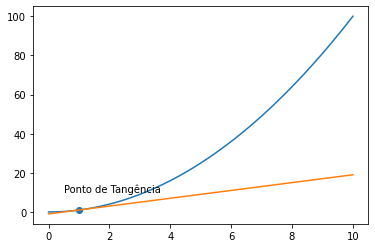

In [29]:
import matplotlib.pyplot as plt
x = np.linspace(0,10, 101)
y1 = x ** 2
y2 = 2*x -1

plt.plot(x, y1)
plt.plot(x,y2)
plt.scatter(1,1)
plt.text(0.5,10, 'Ponto de Tangência')

<h2 style='font-size:30px'> Exercícios página 87</h2>

a:
t=5; slope=-44.4
t=10; slope=-38.8
t=20; slope=-27.8
t=25; slope=-22.2
t=30; slope=-16.666666666666668


b: Tangente = -33.3


<AxesSubplot:>

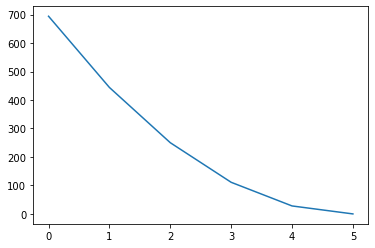

In [61]:
# 1.
tank = pd.DataFrame({'t (min)':[i*5 for i in range(1,7)],
                    'V (gal)':[694, 444, 250, 111, 28,0]})

# a.
xp = 15
yp = 250
print('a:')
for i in range(len(tank)):
    if i != 2:
        m = (tank.iloc[i,1] - yp) / (tank.iloc[i,0] - xp)
        print(f't={tank.iloc[i,0]}; slope={m}')
        
# b.
# Vamos calcular a média das inclinações quando t do ponto Q é 10 e 20.
t10 = (tank.iloc[1,1] - yp) / (tank.iloc[1,0] - xp)
t20 = (tank.iloc[3,1] - yp) / (tank.iloc[3,0] - xp)
print('\n')
print(f'b: Tangente = {(t10 + t20)/2}')

# c.
tank['V (gal)'].plot()

In [68]:
# 5.
# a.
print('a')
x = np.array([0.5, 0.1, 0.05, 0.01])
t = 2
height_i = 40 * t - 16 * (t**2)
for delta in x:
    time_elapsed = t + delta
    height_f = (40 * time_elapsed) - (16 * (time_elapsed**2))
    m = (height_f - height_i) / (delta)
    print(m)
    
print('\n')
# b.
delta = 10 ** -10
time_elapsed = t+delta
height_f = (40 * time_elapsed) - (16 * (time_elapsed **2))
m = (height_f - height_i) / delta
print(f'b: {m}')

a
-32.0
-25.600000000000023
-24.799999999999898
-24.159999999999116


b: -24.000001985768904


a:
x=2.0; m = 0.0
x=1.5; m = 1.7321
x=1.4; m = -1.0847
x=1.3; m = -2.7433
x=1.2; m = 4.3301
x=1.1; m = -2.8173
x=0.9; m = 3.4202
x=0.8; m = -5.0
x=0.7; m = -2.6061
x=0.6; m = -2.1651
x=0.5; m = 0.0

b:


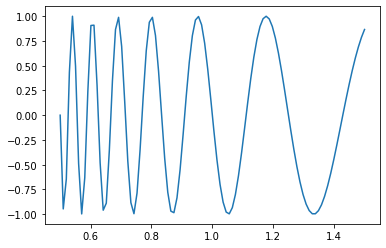


c:
-31.415946165998022


In [114]:
# 9.
px = 1
py = 0
ys = []
#a.
print('a:')
xs = sorted(np.array([i/10 for i in range(15, 4,-1) if i !=10] + [2]), reverse=True)
for x in xs:
    y = np.sin(10 * np.pi / x)
    # Colocando os y's e uma lista para agilizar a resolução do item b.
    ys.append(y)
    m = round((y - py) / (x - px),4)
    print(f'x={x}; m = {m}')

# As inclinações não estão chegando em um limite!
print('\nb:')
# b.
xs_b = np.linspace(0.5,1.5, 100)
ys_b = np.sin(10*np.pi / xs_b)
plt.plot(xs_b, ys_b)
plt.show()
# Pois ora o valor de y é maior do que 0, ora menor, o que faz com que a secante possa ter inclinações tanto positivas, quanto negativas.
print('\nc:')
# c.
delta = 10 ** -10
x = px +delta
y = np.sin(10*np.pi / x)
m = (y - py) / (x - px)
print(m)

<h2 style='font-size:30px'> The Limit of a Function</h2>
<div>
    <ul style='font-size:20px'> 
        <li>
            Vamos aprender um pouco sobre notações. Digamos que nós temos a função quadrática e quiséssemos saber qual valor ela retornará usando valores cada vez mais próximos de 2.
            $$
            f(x) = x^2 - x + 2
            $$
        </li>
    </ul>
</div>

In [121]:
# Vamos investigar isso.
deltas = np.array([1, 0.5, 0.25, 0.1, 0.01, 0.001, 0.0001])
for delta in deltas:
    x = 2+delta
    y = (x**2) - x +2
    print(y)
print('\n')   
for delta in -deltas:
    x = 2+delta
    y = (x**2) - x +2
    print(y)

8.0
5.75
4.8125
4.3100000000000005
4.030099999999999
4.003000999999999
4.00030001


2.0
2.75
3.3125
3.71
3.9701000000000004
3.9970010000000005
3.9997000099999998


<ul style='font-size:20px'> 
        <li>
            Note que quanto mais x se aproxima de 2, (seja pelo lado positivo, quanto pelo negativo) mais y fica próximo de 4. Portanto, podemos falar que, conforme a abscissa se aproxima de 2, a função alcança um valor limite de 4. Isso pode ser expresso, matematicamente, como:
            $$
            \lim_{x \to 2} (x^2 - x + 2) = 4
            $$
        </li>
    <li> 
        O uso dessa notação é bastante importante para funções com restrição de valores de abscissas.
    </li>
    </ul>

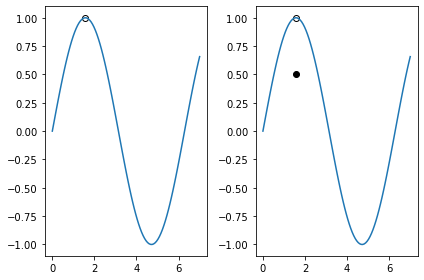

In [138]:
x = np.linspace(0,7, 100)
plt.subplot(121)
plt.plot(x,np.sin(x))
plt.scatter(np.pi/2,np.sin(np.pi/2), color='white', edgecolors='k')

plt.subplot(122)
plt.plot(x,np.sin(x))
plt.scatter(np.pi/2,np.sin(np.pi/2), color='white', edgecolors='k')
plt.scatter(np.pi/2,0.5, color='k', edgecolors='k')
plt.tight_layout()

<div> 
    <ul style='font-size:20px'> 
        <li> 
            No caso dos dois gráficos acima (funções seno modificadas), mesmo que o valor da função quando x=90º não seja 1, não podemos negar que o seu limite conforme x se aproxima de 90 graus é 1.
            $$
            \lim_{x \to \pi/2} f(x) = 1
            $$
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Example I</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre o valor de:$$\lim_{x \to 1} \frac{x-1}{x^2-1}$$
        </li>
    </ul>
</div>

Backwards:
0.0 --> 1.0
0.2 --> 0.8333333333333334
0.5 --> 0.6666666666666666
0.9 --> 0.5263157894736843
0.99 --> 0.5025125628140701
0.999 --> 0.5002501250625384

Forward:
2.0 --> 0.3333333333333333
1.5 --> 0.4
1.2 --> 0.4545454545454545
1.1 --> 0.47619047619047616
1.01 --> 0.49751243781094556
1.001 --> 0.4997501249375518
1.0001 --> 0.4999750012500894


<ipython-input-145-179efb64d18e>:18: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(xs, (xs-1)/(xs**2-1))


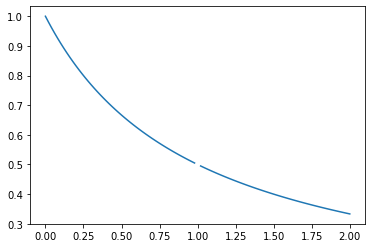

In [145]:
# Observe que não podemos ter x=1 por conta da divisão. Portanto, teremos que descobrir esse limite iterativamente.
backwards = np.array([0, 0.2, 0.5, 0.9, 0.99, 0.999])
forward = np.array([2, 1.5, 1.2, 1.1, 1.01, 1.001, 1.0001])


# Limite por trás.
print('Backwards:')
for number in backwards:
    exp = (number-1)/((number**2)-1)
    print(number,'-->', exp)
    
print('\nForward:')
for number in forward:
    exp = (number-1)/((number**2)-1)
    print(number,'-->', exp)
    
xs = np.linspace(0,2,101)
plt.plot(xs, (xs-1)/(xs**2-1))
plt.show()

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Observe que, tanto de trás pra frente, quanto de frente para trás, o valor limite alcançado é 0.5.
        </li>
    </ul>
</div>

Backwards:
0.0 --> 1.0
0.2 --> 0.8333333333333334
0.5 --> 0.6666666666666666
0.9 --> 0.5263157894736843
0.99 --> 0.5025125628140701
0.999 --> 0.5002501250625384

Forward:
2.0 --> 0.3333333333333333
1.5 --> 0.4
1.2 --> 0.4545454545454545
1.1 --> 0.47619047619047616
1.01 --> 0.49751243781094556
1.001 --> 0.4997501249375518
1.0001 --> 0.4999750012500894


<ipython-input-148-d3508f409541>:18: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(xs, (xs-1)/(xs**2-1))


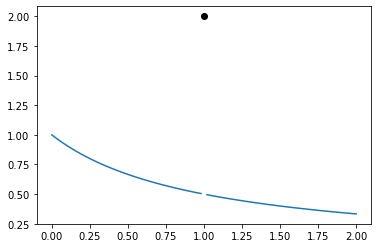

In [148]:
# Agora, se conferíssemos uma condição extra à função? Se x=1, y=2, por exemplo.
backwards = np.array([0, 0.2, 0.5, 0.9, 0.99, 0.999])
forward = np.array([2, 1.5, 1.2, 1.1, 1.01, 1.001, 1.0001])


# Limite por trás.
print('Backwards:')
for number in backwards:
    exp = (number-1)/((number**2)-1)
    print(number,'-->', exp)
    
print('\nForward:')
for number in forward:
    exp = (number-1)/((number**2)-1)
    print(number,'-->', exp)
    
xs = np.linspace(0,2,101)
plt.plot(xs, (xs-1)/(xs**2-1))
plt.scatter(1,2, color='k')
plt.show()

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Como o limite consiste em um valor que a função <strong> tendencia</strong> a ter, não podemos dizer que 2 é o resultado.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Example II</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre o valor de:$$\lim_{t \to 0} \frac{\sqrt{t^2+9}-3}{t^2}$$
        </li>
    </ul>
</div>

Backwards: [0.15138782 0.16227766 0.16552506 0.1666204  0.1666662  0.16666666]
Forward: [0.15138782 0.16227766 0.16552506 0.1666204  0.1666662  0.16666666]


<ipython-input-202-75720a7362d3>:13: RuntimeWarning: invalid value encountered in true_divide
  ys = (np.sqrt((xs**2)+9) - 3)/(xs**2)


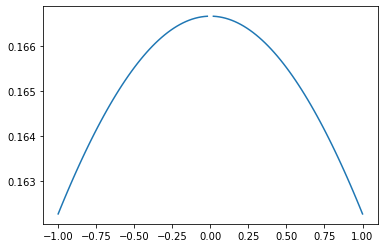

In [202]:
# Novamente, essa função tem a restrição de que x!=0.
backwards=np.array([-2,-1,-0.5, -1e-1, -1e-2, -1e-3])
forward = -backwards

y_back = (np.sqrt((backwards**2)+9) - 3)/(backwards**2)
y_fwd = (np.sqrt((forward**2)+9) - 3)/(forward**2)

print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

# O limite, dessa maneira, é 0.167 (ou 1/6).

# O mesmo pode ser dito graficamente.
xs = np.linspace(-1,1,101)
ys = (np.sqrt((xs**2)+9) - 3)/(xs**2)
plt.plot(xs,ys)

In [201]:
# Mas se colocássemos um valor de t muito pequeno?
backwards=np.array([-2,-1,-0.5, -1e-1, -1e-2, -1e-10])
forward = -backwards

y_back = (np.sqrt((backwards**2)+9) - 3)/(backwards**2)
y_fwd = (np.sqrt((forward**2)+9) - 3)/(forward**2)

print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

Backwards: [0.15138782 0.16227766 0.16552506 0.1666204  0.1666662  0.        ]
Forward: [0.15138782 0.16227766 0.16552506 0.1666204  0.1666662  0.        ]


<div> 
    <ul style='font-size:20px'> 
        <li> 
            Veja, com $10^{-10}$, o limite declarado é 0. Isso significa que o resultado deve ser 0, e não 1/6? Não, como o autor explicará na próxima seção.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Example III</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre o valor de: $$\lim_{x \to 0} \frac{\sin{x}}{x}$$
        </li>
    </ul>
</div>

Backwards: [0.45464871 0.84147098 0.99833417 0.99998333 0.99999983]
Forward: [0.45464871 0.84147098 0.99833417 0.99998333 0.99999983]


<ipython-input-191-16be5359adc4>:13: RuntimeWarning: invalid value encountered in true_divide
  ys = np.sin(xs) / xs


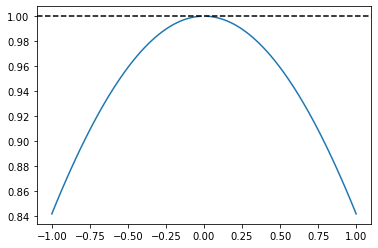

In [191]:
# Note que a expressão tem a exigência de que x!=0.
backwards = np.array([-2,-1, -1e-1, -1e-2, -1e-3])
forward = -backwards

y_back = np.sin(backwards) / backwards
y_fwd = np.sin(forward) / forward

# Vemos que o valor limite da função é 1.
print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

# O mesmo se confirma graficamente.
xs = np.linspace(-1,1,101)
ys = np.sin(xs) / xs
plt.plot(xs, ys)
plt.axhline(1,linestyle='--', color='k')

<p style='font-size:20px'>$$ \therefore \lim_{x \to 0} \frac{\sin{x}}{x}=1$$

<h3 style='font-size:30px;font-style:italic'> Example IV</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre o valor de: $$\lim_{x \to 0} \sin{\frac{\pi}{x}}$$
        </li>
    </ul>
</div>

Backwards: [-1.00000000e+00 -1.22464680e-16  1.22464680e-15 -1.96438672e-15
  3.21416646e-13]
Forward: [ 1.00000000e+00  1.22464680e-16 -1.22464680e-15  1.96438672e-15
 -3.21416646e-13]


<ipython-input-206-35e081da162c>:12: RuntimeWarning: divide by zero encountered in true_divide
  ys = np.sin(np.pi/xs)
<ipython-input-206-35e081da162c>:12: RuntimeWarning: invalid value encountered in sin
  ys = np.sin(np.pi/xs)


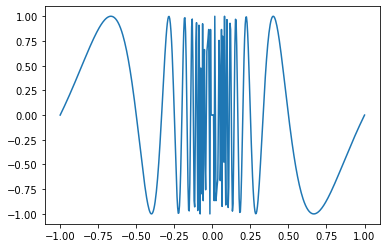

In [206]:
# Lembre-se x!=0.
backwards = np.array([-2,-1, -1e-1, -1e-2, -1e-3])
forward = -backwards

y_back = np.sin(np.pi/backwards)
y_fwd = np.sin(np.pi/forward)

# O output é estranho, vamos plotar um gráfico da função.
print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

xs = np.linspace(-1,1,501)
ys = np.sin(np.pi/xs)
plt.plot(xs,ys)

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Veja que, como f(x) não se aproxima de um valor fixo conforme x tende 0:
            
            $$\lim_{x \to 0} \sin{\frac{\pi}{x}}=\nexists$$ 
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Example V</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre o valor de: $$\lim_{x \to 0}(x^3 + \frac{\cos{5x}}{10000})$$
        </li>
    </ul>
</div>

In [220]:
backwards = np.array([-2,-1, -1e-1, -1e-2, -1e-3])
forward = -backwards

y_back = (backwards**3) + (np.cos(5*backwards)/10000)
y_fwd = (backwards**3) + (np.cos(5*forward)/10000)

print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

# Em um primeiro momento, parece que os valores convergem para 0.
round(y_fwd[4],6), round(y_back[4],6)

Backwards: [-8.00008391e+00 -9.99971634e-01 -9.12241744e-04  9.88750260e-05
  9.99977500e-05]
Forward: [-8.00008391e+00 -9.99971634e-01 -9.12241744e-04  9.88750260e-05
  9.99977500e-05]


(0.0001, 0.0001)

In [223]:
# Vamos fazer uma segunda verificação, agora com x's ainda mais próximos de 0.
backwards = np.array([-1e-1, -1e-2, -1e-5, -1e-10, -1e-20])
forward = -backwards

y_back = (backwards**3) + (np.cos(5*backwards)/10000)
y_fwd = (backwards**3) + (np.cos(5*forward)/10000)

print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

# Mas veja, o valor de 0.0001 ainda persiste!
round(y_fwd[4],6), round(y_back[4],6)

Backwards: [-9.12241744e-04  9.88750260e-05  9.99999999e-05  1.00000000e-04
  1.00000000e-04]
Forward: [-9.12241744e-04  9.88750260e-05  9.99999999e-05  1.00000000e-04
  1.00000000e-04]


(0.0001, 0.0001)

<h3 style='font-size:30px;font-style:italic'> Example VI</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Dada a função H(t) que quando t&lt;0, H(t)=0 e t≥1, H(t)=1, encontre $$ \lim_{t \to 0} H(t)$$
        </li>
    </ul>
</div>

In [238]:
backwards = np.array([-1e-1, -1e-2, -1e-5, -1e-10, -1e-20])
forward = -backwards

for number in backwards:
    print(number, '-->',0)
    
for number in forward:
    print(number, '-->',1) 

-0.1 --> 0
-0.01 --> 0
-1e-05 --> 0
-1e-10 --> 0
-1e-20 --> 0
0.1 --> 1
0.01 --> 1
1e-05 --> 1
1e-10 --> 1
1e-20 --> 1


<div> 
    <ul style='font-size:20px'> 
        <li> 
            Em cada sentido, H(t) se aproxima de valores distintos. Portanto, não há um limite único para essa função neste caso!
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> One-Sided Limits</h2>
<div>
    <ul style='font-size:20px'> 
        <li>
            É levando em consideração funções como a última apresentada que existem os limites unilaterais. No caso dela, o limite à esquerda é 0,enquanto o seu à direita é 1.
            
            <p>$\therefore \lim_{t \to 0^{-}} H(t)=0  $ and $ \lim_{t \to 0^{+}} H(t)=1 $</p>
        </li>
        <li> 
        Para que uma dada função tenha um único limite com um certo valor de abscissa, é necessário haver o seguinte padrão:
            <p> <p>$\lim_{x \to a} f(x)=L$ <strong>if and only if</strong> $\lim_{x \to a^{-}} f(x)=L  $ <strong>and</strong> $ \lim_{x \to a^{+}} f(x)=L $</p></p>
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Example VII</h3>

In [239]:
# a.
print('a: 3')

# b.
print('b: 1')

# c.
print('c: Does not exist!')

# d.
print('d: 2')

# e.
print('e: 2')

# f.
print('f: 2')

a: 3
b: 1
c: Does not exist!
d: 2
e: 2
f: 2


<h2 style='font-size:30px'> Infinite Limits</h2>
<h3 style='font-size:30px;font-style:italic'> Example VIII</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre: $ \lim_{x \to 0} \frac{1}{x^2}$
        </li>
    </ul>
</div>

In [241]:
backwards = np.array([-2,-1, -1e-1, -1e-2, -1e-3])
forward = -backwards

y_back = 1/(backwards**2)
y_fwd = 1/(forward**2)

print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

# Em um primeiro momento, parece que os valores não aparentam convergit para nenhum número.
round(y_fwd[4],6), round(y_back[4],6)

Backwards: [2.5e-01 1.0e+00 1.0e+02 1.0e+04 1.0e+06]
Forward: [2.5e-01 1.0e+00 1.0e+02 1.0e+04 1.0e+06]


(1000000.0, 1000000.0)

Backwards: [1.e+02 1.e+04 1.e+06 1.e+20 1.e+40]
Forward: [1.e+02 1.e+04 1.e+06 1.e+20 1.e+40]


<ipython-input-245-0354df337c84>:16: RuntimeWarning: divide by zero encountered in true_divide
  ys = 1/(xs**2)


(0.0, 100.0)

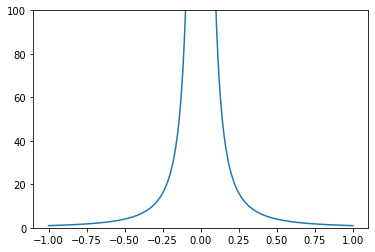

In [245]:
# Vamos ser mais radicais agora.
backwards = np.array([-1e-1, -1e-2, -1e-3, -1e-10, -1e-20])
forward = -backwards

y_back = 1/(backwards**2)
y_fwd = 1/(forward**2)

print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

# O limite continua crescendo!
round(y_fwd[4],6), round(y_back[4],6)

# Vamos plotar um gráfico para entendermos a situação melhor.
xs = np.linspace(-1,1, 1001)
ys = 1/(xs**2)

plt.plot(xs, ys)
plt.ylim([0,100])

<div>
    <ul style='font-size:20px'> 
        <li>
           Como o denominador é $x^2$, quanto mais aproximamos x de 0, mais o resultado da expressão aumenta, alcançando o infinito gradativamente!
        </li>
        <li> 
            Estamos diante de um caso especial de inexistência de limite, que pode ser expresso como: 
            $$
            \lim_{x \to 0} \frac{1}{x^2}=\infty
            $$
        </li>
    </ul>
</div>

<div>
    <ul style='font-size:20px'> 
        <li>
           Portanto, quando f(x) alcança valores cada vez maiores conforme nos aproximamos de x, podemos dizer que:
            $$
            \lim_{x \to a} f(x)=\infty
            $$
        </li>
        <li>
            É perfeitamente possível haver outros casos de limites infinitos, como: $\lim_{x \to a} f(x)=-\infty$ <strong> ou</strong> $\lim_{x \to a^{-}} f(x)=\infty$
        </li>
    </ul>
</div>

<ipython-input-257-be52e9754112>:2: RuntimeWarning: invalid value encountered in true_divide
  ys = xs/(xs**2)


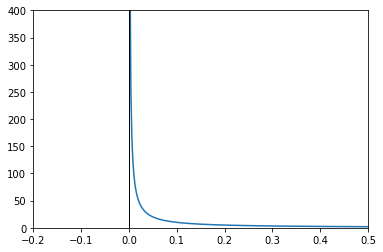

In [257]:
# No caso de limites infinitos unilaterais, a reta vertical cujo valor é 'a' é conhecida como a assintota. Sua particularidade é que
# ela e a curva da função tendem a se encontrar apenas no infinito.
xs = np.linspace(-1,1,1001)
ys = xs/(xs**2)

plt.plot(xs, ys)
plt.xlim([-0.2,0.5])
plt.ylim([0,400])
plt.axvline(0, color='k', lw=1)

<h3 style='font-size:30px;font-style:italic'> Example IX</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre: $ \lim_{x \to 3^{+}} \frac{2x}{x-3}$ <strong> e</strong> $\lim_{x \to 3^{-}} \frac{2x}{x-3}$
        </li>
    </ul>
</div>

In [290]:
backwards=np.array([2,2.5, 2.9, 2.99, 2.999])
forward= np.array([4, 3.5, 3.1, 3.01, 3.001])

y_back = (2*backwards)/(backwards-3)
y_fwd = (2*forward)/(forward-3)

# Observe, em ambos os lados, não tendenciamos a um número específico. Obtemos valores cada vez maiores.
print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

Backwards: [-4.000e+00 -1.000e+01 -5.800e+01 -5.980e+02 -5.998e+03]
Forward: [   8.   14.   62.  602. 6002.]


<ipython-input-295-5942d4d9bbdf>:4: RuntimeWarning: divide by zero encountered in true_divide
  ys = (2*x)/(x-3)


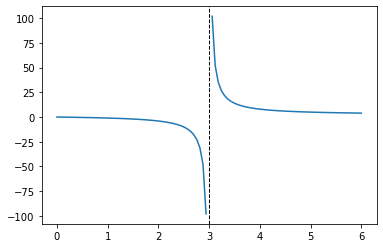

In [295]:
# Observe, conforme x se aproxima de 3 pelo lado negativo, a função se aproxima de -oo; pelo lado psoitivo,
# o valor tendenciado é +oo
xs = np.linspace(0,6, 101)
ys = (2*x)/(x-3)
plt.plot(xs, ys)
plt.axvline(3, lw=1, color='k', linestyle='--')

<p style='font-size:20px'>$\therefore \lim_{x \to 3^{+}} \frac{2x}{x-3}=+\infty$ <strong> and</strong> $ \lim_{x \to 3^{-}} \frac{2x}{x-3}=-\infty$

<h3 style='font-size:30px;font-style:italic'> Example X</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre as assintotas verticais de $f(x) = \tan{x}$
        </li>
    </ul>
</div>

In [303]:
# Como tan x = (sin x / cos x), a função tenderá ao infinito sempre que cos x=0.
# Neste caso, todo ângulo 'a' gerado pela fórmula a = (2n + 1)*pi/2 {n sendo um número inteiro}
# gera uma assintota vertical x = a.

<h2 style='font-size:30px'> 2.2 Exercises (p. 96)</h2>
<h3 style='font-size:30px;font-style:italic'> 5.</h3>

In [304]:
# a.
print('a: 2')

# b.
print('b: 3')

# c.
print('c: Not Exists')

# d.
print('d: 4')

# e.
print('e: Not Exists')

a: 2
b: 3
c: Not Exists
d: 4
e: 4


<h3 style='font-size:30px;font-style:italic'> 9.</h3>

In [ ]:
# a.
print('a: -oo')

# b.
print('b: +oo')

# c.
print('c: +oo')

# d.
print('d: -oo')

# e.
print('e: +oo')

<h3 style='font-size:30px;font-style:italic'> 29.</h3>

In [308]:
# np.log computa o logaritmo natural (ln).
forward = np.array([4,3.5, 3.1, 3.01, 3.001, 3.00001, 3.0000000001])
y_fwd = np.log((forward**2)-9)

print(f'Forward: {y_fwd}')

Forward: [  1.94591015   1.178655    -0.49429632  -2.81174544  -5.11582916
  -9.72116433 -21.23409138]


<p style='font-size:20px'> $\lim_{x \to 3^{+}} \ln{(x^2-9)} = -\infty$</p>

<h2 style='font-size:30px'> 2.3 Calculating Limits Using The Limit Laws</h2>
<div>
    <ul style='font-size:20px'> 
        <li>
            Vamos agora aprender a refinar a nossa busca pelos limites de funções por meio das chamadas <em> Leis do Limite</em>
        </li>
        <li> 
            Considerando <em> c</em> uma constante e que $\lim_{x \to a} f(x)$ e $\lim_{x \to a} g(x)$ existem:
            <ul style='list-style-type:decimal'>
                <li> $\lim_{x \to a} [f(x)+g(x)]= \lim_{x \to a} f(x) + \lim_{x \to a} g(x)$</li>
                <li> $\lim_{x \to a} [f(x)-g(x)]= \lim_{x \to a} f(x) - \lim_{x \to a} g(x)$</li>
                <li> $\lim_{x \to a} [cf(x)]= c\lim_{x \to a} f(x)$</li>
                <li> $\lim_{x \to a} [f(x)g(x)]= \lim_{x \to a} f(x) * \lim_{x \to a} g(x)$</li>
                <li> $\lim_{x \to a} \frac{f(x)}{g(x)}= \frac{\lim_{x \to a} f(x)} {\lim_{x \to a} g(x)}$; se $\lim_{x \to a} g(x) \neq 0$</li>
            </ul>
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Example I</h3>
<div> 
    <ul style='font-size:20px;list-style-type:lower-alpha'> 
        <li> 
            Encontre de $\lim_{x \to -2} [f(x) + 5g(x)]$
        </li>
        <li> 
            Encontre de $\lim_{x \to 1} [f(x)g(x)]$
        </li>
        <li> 
            Encontre de $\lim_{x \to 2} \frac{f(x)}{g(x)}$
        </li>
    </ul>
</div>

In [7]:
# a.
lim_f_a = 1
lim_g_a = 5*-1
print(f'a: {lim_f_a + lim_g_a}')

# a.
lim_f_b = 2
lim_g_b = None
print(f'b: Not Exists')

# a.
lim_f_a = 2.5
lim_g_a = 0
print(f'c: +oo')

a: -4
b: Not Exists
c: +oo


<div>
    <ul style='font-size:20px'> 
        <li>
            Outras leis do limite:
        </li>
                <li> 6. $\lim_{x \to a}[f(x)]^{n}=[\lim_{x \to a}f(x)]^{n}$</li>
                <li>7. $\lim_{x \to a}c=c$ </li>
                <li>8. $\lim_{x \to a}x=a$ </li>
                <li>9. $\lim_{x \to a}x^{n}=a^{n} (n \in \mathbb{Z}^{+})$ (basta aplicar a lei 6 com a 8) </li>
                <li>10. $\lim_{x \to a}\sqrt[n]{x}=\sqrt[n]{a} (n \in \mathbb{Z}^{+})$</li>
                <li>11. $\lim_{x \to a}\sqrt[n]{f(x)}=\sqrt[n]{\lim_{x \to a}f(x)}(n \in \mathbb{Z}^{+})$ </li>
            </ul>
    </div>

<h3 style='font-size:30px;font-style:italic'> Example II</h3>
<div> 
    <ul style='font-size:20px;list-style-type:lower-alpha'> 
        <li> 
            Encontre de $\lim_{x \to 5}(2x^{2}-3x+4)$
        </li>
        <li> 
            Encontre de $\lim_{x \to -2}\frac{x^{3}+2x^{2}-1}{5-3x}$
        </li>
    </ul>
</div>

In [16]:
#a.

xa = 5
lim_a1 = 2*(xa**2)
lim_a2 = 3*xa
lim_a3 = 4
print(f'a: {lim_a1-lim_a2+lim_a3}')

# b.
xb = -2
lim_b1= xb**3
lim_b2= 2*(xb**2)
lim_b3= -1
lim_b4 = 5
lim_b5 = 3*xb
print(f'{(lim_b1+lim_b2-lim_b3)/(lim_b4-lim_b5)}')

a: 39
0.09090909090909091


<div>
    <ul style='font-size:20px'> 
        <li>
            Observe que calculamos os limites simplesmente substituindo a variável pelo valor de aproximação. Isso pode ser feito apenas quando estamos diante de uma função polinomial e/ou racional que tem <em> a</em> no domínio de <em> f</em>.
        </li>
        <li> 
            Neste caso, é válido que $\lim_{x \to a}f(x)=f(a)$ e que f(x) é contínua em <em> a</em>.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Example III</h3>
<div> 
    <ul style='font-size:20px;list-style-type:lower-alpha'> 
        <li> 
            Encontre de $\lim_{x \to 1}\frac{x^{2}-1}{x-1}$
        </li>
    </ul>
</div>
<p style='font-size:20px'> $\lim_{x \to 1}\frac{x^{2}-1}{x-1}=\lim_{x \to 1}\frac{(x+1)(x-1)}{x-1}=\lim_{x \to 1}x+1$</p>

In [18]:
# Neste caso, não conseguimos trocar x por 1, mas uma simples reorganização da função de cima nos possibilita calcular o 
# limite de maneira muito mais fácil.
xa = 1
lim_a = xa+1
print(f'a: {xa+1}')

a: 2


<h3 style='font-size:30px;font-style:italic'> Example IV</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre $\lim_{x \to 1} g(x)$ em que
            $
            g(x)=x+1$ if  x$\neq$ 1
            <strong>e</strong> 
            $g(x)=\pi$ if  x= 1
        </li>
    </ul>
</div>

In [22]:
backwards = np.array([0, 0.5, 0.9, 0.99, 0.999])
forward =np.array([2,1.1, 1.01, 1.001, 1.0001])

y_back = backwards + 1
y_fwd = forward+1

print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

Backwards: [1.    1.5   1.9   1.99  1.999]
Forward: [3.     2.1    2.01   2.001  2.0001]


<p style='font-size:20px'>$\lim_{x \to 1} g(x)=2$ 

<h3 style='font-size:30px;font-style:italic'> Example V</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre: $\lim_{h \to 0}\frac{(3+h)^{2}-9}{h}$
        </li>
    </ul>
</div>

In [28]:
# Aqui, a regra da substituição não vale, já que não há valor para a função quand o h=0.
backwards = np.array([-1, -0.5, -0.1, -0.001, -0.0001])
forward = -backwards

y_back = (((3+backwards)**2) -9)/backwards
y_fwd = (((3+forward)**2) -9)/forward

print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

Backwards: [5.     5.5    5.9    5.999  5.9999]
Forward: [7.     6.5    6.1    6.001  6.0001]


<p style='font-size:20px'> $\lim_{h \to 0}\frac{(3+h)^{2}-9}{h}=6$

<h3 style='font-size:30px;font-style:italic'> Example VI</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre: $\lim_{t \to 0}\frac{\sqrt{t^{2}+9} -3}{t^{2}}$
        </li>
    </ul>
</div>

In [41]:
# Novamente: não substitua t por 0.

# Como a equação possui uma raiz, cuidado com valores muito baixos para t, pois o computador pode arredondar t^2 para 0.
backwards = np.array([-1, -0.5, -0.1, -0.001, -0.0001])
forward = -backwards


y_back = (np.sqrt((backwards**2)+9) -3)/ (backwards**2)
y_fwd = (np.sqrt((forward**2)+9) -3)/ (forward**2)

print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

Backwards: [0.16227766 0.16552506 0.1666204  0.16666666 0.16666668]
Forward: [0.16227766 0.16552506 0.1666204  0.16666666 0.16666668]


<p style='font-size:20px'> $\lim_{t \to 0}\frac{\sqrt{t^{2}+9} -3}{t^{2}}=\frac{1}{6}$

<h3 style='font-size:30px;font-style:italic'> Example VII</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre: $\lim_{x \to 0}|x|$
        </li>
    </ul>
</div>

In [44]:
backwards = np.array([-1, -0.5, -0.1, -0.001, -0.0001])
forward = -backwards

y_back = np.abs(backwards)
y_fwd = np.abs(forward)

# Os valores ficam cada vez mais próximos de 0.
print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

Backwards: [1.e+00 5.e-01 1.e-01 1.e-03 1.e-04]
Forward: [1.e+00 5.e-01 1.e-01 1.e-03 1.e-04]


<p style='font-size:20px'>$\lim_{x \to 0}|x|=0$

<h3 style='font-size:30px;font-style:italic'> Example VIII</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Mostre que $\lim_{x \to 0}\frac{|x|}{x}$ não existe!
        </li>
    </ul>
</div>

In [46]:
backwards = np.array([-1, -0.5, -0.1, -0.001, -0.0001])
forward = -backwards

y_back = np.abs(backwards)/backwards
y_fwd = np.abs(forward)/forward

# Quando x<0, a divisão entre o seu módulo do número e ele mesmo resulta em -1; quando x>=0, a expressão se resulta em 1
print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

Backwards: [-1. -1. -1. -1. -1.]
Forward: [1. 1. 1. 1. 1.]


<h3 style='font-size:30px;font-style:italic'> Example IX</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Dada a função $f(x)=\sqrt{x-4}$ <strong> se</strong> $x >4$ <strong> e</strong> $f(x)=8 -2x$  <strong> se</strong> $x <4$, determine se $\lim_{x \to 4}f(x)$ existe.
        </li>
    </ul>
</div>

In [56]:
backwards = np.array([3, 3.5, 3.9, 3.99, 3.999])
forward = np.array([5, 4.5, 4.1, 4.01, 4.001])

y_back = 8- (2*backwards)
y_fwd = np.sqrt(forward-4)

# Os números parecem tender a zero.
print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

Backwards: [2.e+00 1.e+00 2.e-01 2.e-02 2.e-03]
Forward: [1.         0.70710678 0.31622777 0.1        0.03162278]


<div> 
    <ul style='font-size:20px'> 
        <li> 
           Lembre-se, podemos usar a substituição ao invés de fazer os cálculos com arrays do numpy.
        </li>
    </ul>
</div>

In [64]:
y_back = 8- (2*4)
y_fwd = np.sqrt(4-4)

print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

Backwards: 0
Forward: 0.0


<p style='font-size:20px'> $\therefore\lim_{x \to 4}f(x)=0$

<h3 style='font-size:30px;font-style:italic'> Example X (Greatest Integer Function)</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Mostre que $\lim_{x \to 3}||x||$ não existe.
        </li>
    </ul>
</div>

In [100]:
def greatest_integer_function(n):
    if n>=0:
        return int(n)
    else:
        if n == int(n):
            return n
        else:
            return int(n)-1
    
greatest_integer_function(.9)

0

In [101]:
backwards = np.array([2, 2.5, 2.9, 2.99, 2.99])
forward = np.array([4, 3.5, 3.1, 3.01, 3.001])

y_back = [greatest_integer_function(n) for n in backwards]
y_fwd = [greatest_integer_function(n) for n in forward]

# Os limites não são os mesmos! Portanto, não existe um limite bidirecional para a Greatest Integer Function.
print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

Backwards: [2, 2, 2, 2, 2]
Forward: [4, 3, 3, 3, 3]


<p style='font-size:20px'> $\lim_{x \to 3}||x||=\nexists$

<h3 style='font-size:30px;font-style:italic'> Teorema 2</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Se $f(x)\leq g(x)$ quando x se aproxima de a e os limites de f e g existem conforme x se aproxima de a:
            $$
            \lim_{x \to a}f(x)\leq \lim_{x \to a}g(x)
            $$
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Squeeze Theorem</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Se $f(x)\leq g(x)\leq h(x)$ quando x se aproxima de a e $\lim_{x \to a}f(x) = \lim_{x \to a}h(x)=L$, então:
            $$
            \lim_{x \to a}g(x)=L
            $$
        </li>
    </ul>
</div>
<center> 
    <h1> Ilustração gráfica do Squeeze Theorem</h1>
    <img src='squeeze_theorem.png'>
</center>

<h3 style='font-size:30px;font-style:italic'> Example XI</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Mostre que $\lim_{x \to 0} x^{2}\sin{\frac{1}{x}}$ 
        </li>
    </ul>
</div>

In [107]:
backwards = np.array([-1, -.5, -1e1, -1e-2, -1e-3])
forward = backwards

y_back = (backwards**2) * np.sin(1/backwards)
y_fwd = (forward**2) * np.sin(1/forward)

print(f'Backwards: {y_back}')
print(f'Forward: {y_fwd}')

Backwards: [-8.41470985e-01 -2.27324357e-01 -9.98334166e+00  5.06365641e-05
 -8.26879541e-07]
Forward: [-8.41470985e-01 -2.27324357e-01 -9.98334166e+00  5.06365641e-05
 -8.26879541e-07]


<h2 style='font-size:30px'> 2.3 Exercises (p. 106)</h2>
<h3 style='font-size:30px;font-style:italic'> 39.</h3>

In [109]:
left = np.array([2,2.5, 2.9, 2.99, 2.999, 2.99999])
right = np.array([4,3.5, 3.1, 3.01, 3.001, 3.00001])

y_left = (2*left)+np.abs(left-3)
y_right = (2*right)+np.abs(right-3)

# O limite é 6.
print(f'Left Limit: {y_left}')
print(f'Right Limit: {y_right}')

Left Limit: [5.      5.5     5.9     5.99    5.999   5.99999]
Right Limit: [9.      7.5     6.3     6.03    6.003   6.00003]


<h3 style='font-size:30px;font-style:italic'> 45.</h3>

b (I): 1
b (II): -1
b (III): Not Exists
Left Limit: [1, 1, 1, 1, 1]
Right Limit: [1, 1, 1, 1, 1]
b (IV): 1


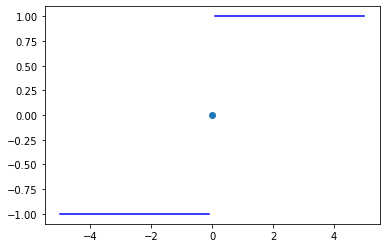

In [136]:
import matplotlib.pyplot as plt
# a.
def signum(x):
    if x<0:
        return -1
    elif x == 0:
        return 0
    else:
        return 1

xs = np.linspace(-5, 5, 101)
xsl = [number for number in xs if number <0]
xsr = [number for number in xs if number >0]
ys = np.array([signum(n) for n in xs])
plt.plot(xsl,ys[:len(xsl)], color='b')
plt.scatter(0,0)
plt.plot(xsr,ys[len(xsl)+1:], color='b')

# b.
# I
print('b (I): 1')

# II
print('b (II): -1')

# III
print('b (III): Not Exists')

# IV
left = np.array([-1, 0.5, -1e-1, -1e-2, -1e-3])
right = -left

y_left = [np.abs(signum(n)) for n in left]
y_right = [np.abs(signum(n)) for n in right]

print(f'Left Limit: {y_left}')
print(f'Right Limit: {y_right}')
print('b (IV): 1')

<h3 style='font-size:30px;font-style:italic'> 55.</h3>

In [144]:
from sympy import symbols, solve, Eq

fx = symbols('x')
eq = Eq((fx-8)/(1.0001-1),10)
solve(eq)

[8.00100000000088]

<h2 style='font-size:30px'> 2.4 The Precise Definition of a Limit</h2>
<p style='font-size:20px'> Decidi pular esta parte para voltar mais tarde.</p>

<h2 style='font-size:30px'> 2.5 Continuity</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Como vimos anteriormente, existem funções cujos limites podem ser medidos apenas por substituição. Para isso, "a" deve estar contido no domínio de f(x).
        </li>
        <li> 
            Dizemos que uma função é contínua em a, se:
            $$
            \lim_{x \to a}f(x)=f(a)
            $$
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Example I</h3>

In [145]:
print(1,3,5)

1 3 5


<h3 style='font-size:30px;font-style:italic'> Example II</h3>

In [146]:
# a
print('a: 2')

# b
print('b: 0')

# c
print('c: 2')

# d
print('d: Em todos os inteiros')

a: 2
b: 0
c: 2
d: Em todos os inteiros


<h3 style='font-size:30px;font-style:italic'> Continuidade Unilateral</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Há limite pela direita se:
            $$
            \lim_{x \to a^{+}}f(x)=f(a)
            $$
        </li>
        <li> 
            Há limite pela esquerda se:
            $$
            \lim_{x \to a^{-}}f(x)=f(a)
            $$
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Example IV</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Prove que a função $f(x)=1-\sqrt{1-x^{2}}$ é contínua no intervalo [-1,1]:
        </li>
    </ul>
</div>

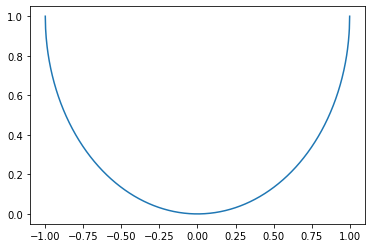

In [148]:
# O livro usa uma conta para provar isso. O que podemos fazer no Python é verificar se o numpy retorna erro ao calcular a função
# ou se haverá alguma descontinuidade na imagem.
xs = np.linspace(-1,1, 1001)
ys = 1-np.sqrt(1-(xs**2))

plt.plot(xs,ys)

<h3 style='font-size:30px;font-style:italic'> Teorema</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Sendo f e g funções contínuas em a e c uma constante, então as seguintes funções também serão contínuas em a.
            <ul style='list-style-type:decimal'> 
                <li> 
                    f+g
                </li>
                <li> 
                    f-g
                </li>
                <li> 
                    cf ou cg
                </li>
                <li> 
                    fg
                </li>
                <li> 
                    $\frac{f}{g}$ se g(a)$\neq 0$
                </li>
            </ul>
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Teorema</h3>
<div> 
    <ul style='font-size:20px;list-style-type:decimal'> 
        <li>
            Qualquer função polinomial é contínua em todos os Reais.
        </li>
        <li>
            As funções racionais são contínuas em todo o seu domínio.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Example V</h3>
<div> 
    <ul style='font-size:20px;list-style-type:decimal'> 
        <li>
            Encontre: $\lim_{x \to -2}\frac{x^{3}+2x^{2}-1}{5-3x}$
        </li>
    </ul>
</div>

In [150]:
left = np.array([-3, -2.5, -2.1, -2.01, -2.001])
right = np.array([-1, -1.5, -1.9, -1.99, -1.999])

y_left = ((left**3)+ (2*(left**2)) -1) / (5-(3*left))
y_right = ((right**3)+ (2*(right**2)) -1)/ (5-(3*right))

print(f'Left: {y_left}')
print(f'Right: {y_right}')

Left: [-0.71428571 -0.33       -0.12752212 -0.09432466 -0.09124821]
Right: [ 0.          0.01315789 -0.05971963 -0.08754777 -0.09057052]


In [156]:
# Descobrindo pelo sympy.
from sympy import Eq, symbols, limit
x_symbol = symbols('x')
y = ((x_symbol**3)+ (2*(x_symbol**2)) -1) / (5-(3*x_symbol))
limit(y, x_symbol, -2)

-1/11

<h3 style='font-size:30px;font-style:italic'> Example VII</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Encontre o valor de: $$\lim_{x \to \pi}\frac{\sin{x}}{2+\cos{x}}$$
        </li>
    </ul>
</div>

In [158]:
left = np.array([2, 2.5, 3.1, 3.14, 3.1415])
right = np.array([4, 3.5, 3.2, 3.15, 3.1416])

y_left = np.sin(left)/(2+np.cos(left))
y_right = np.sin(right)/(2+np.cos(right))

# Por ambos os lados a fução se aproxima de 0.
print(f'Left: {y_left}')
print(f'Right: {y_right}')

Left: [5.74104625e-01 4.99202533e-01 4.15447325e-02 1.59265090e-03
 9.26535893e-05]
Right: [-5.62111568e-01 -3.29825051e-01 -5.82747719e-02 -8.40695025e-03
 -7.34641021e-06]


<h2 style='font-size:30px'> 2.6 Limits at Infinity: Horizontal Asymptotes</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Em seções anteriores, exploramos os limites infinitos, que ocorrem quando pudermos aproximar a função cada vez mais do infinito conforme x fica mais perto de um dado valor. Na abscissa desse valor, traçamos uma reta conhecida como assintota vertical.
        </li>
        <li> 
            Mas, agora, exploraremos uma situação diferente. Há funções em que, conforme aproximamos x do infinito, o seu valor retornado tende a um número, podendo se traçar em sua ordenada o que chamamos de assintota horizontal.
        </li>
    </ul>
</div>

(-2.0, 2.0)

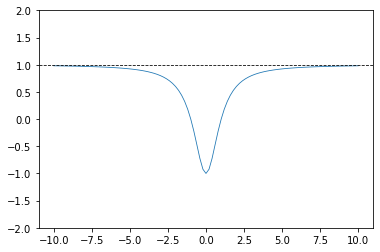

In [174]:
# Faremos agora uma função em que é possível se traçar essa assintota.
xs = np.linspace(-10, 10, 101)
ys = ((xs**2)-1) / ((xs**2)+1)

# Observe que, conforme x tende à infinidade, a função se aproxima cada vez mais de 1.
plt.plot(xs,ys, lw=0.8)
plt.axhline(1, lw=0.8, ls='--',c='k')
plt.ylim([-2,2 ])

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Esta situação pode ser expressa como: $\lim_{x \to \infty}\frac{x^{2}-1}{x^{2}+1}=1$
        </li>
        <li> Observe que a função também se aproxima de 1 conforme x tende a $-\infty$. A notação para essa situação é $\lim_{x \to -\infty}\frac{x^{2}-1}{x^{2}+1}=1$</li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Definição de uma Assintota Horizontal</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            A reta y=L é uma assintota horizontal de y = f(x) se: $\lim_{x \to \infty}=L$ <strong>ou</strong> $\lim_{x \to -\infty}=L$
        </li>
    </ul>
</div>

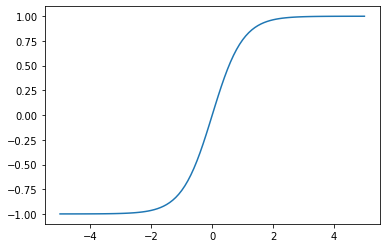

In [179]:
# A função tanh possui duas assintotas (y=1 e y=-1).
xs = np.linspace(-5, 5, 101)
ys = np.tanh(xs) 

plt.plot(xs, ys)

<p style='color:red'> Example I</p>